# Analiza podatkov

## Tukaj bo praviloma analiza podatkov

Za zdaj šele dodajam datoteke

Knižnice

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import funkcije


Tukaj dobimo podatke

In [158]:
podatki = pd.read_csv("godot.csv",on_bad_lines="skip",delimiter=";")
podatki = podatki.dropna().convert_dtypes({"id":int})
podatki

,id,ime,link,app_type,cena,discount,release_date,developer,publisher,all_reviews,genre,achievements,description
0,1942280,Brotato,https://store.steampowered.com/app/1942280/Bro...,Game,"4,99€",No discount,"23 Jun, 2023",Blobfish,Blobfish,"('Overwhelmingly Positive', '74,410', '97%')","('Action', 'Casual', 'Indie', 'RPG')",83,Brotato is a top-down arena shooter roguelite ...
1,1677770,The Case of the Golden Idol,https://store.steampowered.com/app/1677770/The...,Game,"17,99€",No discount,"13 Oct, 2022",Color Gray Games,Playstack,"('Overwhelmingly Positive', '6,115', '98%')","('Adventure', 'Indie')",17,A new kind of detective game that allows you t...
2,2570630,20 Small Mazes,https://store.steampowered.com/app/2570630/20_...,Game,Free,No discount,"16 Feb, 2024",FLEB,FLEB,"('Overwhelmingly Positive', '5,280', '98%')","('Adventure', 'Casual', 'Indie')",1,This is a puzzle game with twenty small mazes....
3,1713610,Purrgatory,https://store.steampowered.com/app/1713610/Pur...,Game,Free,No discount,"22 Aug, 2021",Niv (Darvin Heo),Niv (Darvin Heo),"('Overwhelmingly Positive', '4,115', '99%')","('Adventure', 'Casual', 'Free To Play', 'Indie')",No achievements,A slice-of-death visual novel about making fri...
4,1507970,Word Game: Episode 0,https://store.steampowered.com/app/1507970/Wor...,Game,Free,No discount,"14 Jan, 2021",Team9,Team9,"('Overwhelmingly Positive', '4,514', '98%')","('Adventure', 'Indie', 'RPG', 'Strategy')",No achievements,Word game is literally a game of words. Player...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2377,3084100,Depth Ascend,https://store.steampowered.com/app/3084100/Dep...,Game,Free,No discount,Coming soon,Julián Ochando,Julian Ochando,No reviews,"('Action', 'Casual', 'Indie', 'Racing')",No achievements,"Embark on an epic race for your survival, feed..."
2378,3060400,ShipOS 1994,https://store.steampowered.com/app/3060400/Shi...,Game,Free,No discount,"28 Oct, 2024",Border Collie Games,Border Collie Games,No reviews,"('Casual', 'Indie', 'Simulation', 'Strategy')",No achievements,Are you ready to recover your family's fortune...
2379,2929730,Cat Bait,https://store.steampowered.com/app/2929730/Cat...,Game,Free,No discount,"25 Aug, 2024",Mayni prod.,Mayni prod.,No reviews,"('Action', 'Casual', 'Indie')",No achievements,Cat Bait is a casual game with cute pixel grap...
2380,2936720,Red Nose Guy The LegenDairy Quest,https://store.steampowered.com/app/2936720/Red...,Game,"4,99€",No discount,"25 Jul, 2024",Freya Games,Freya Games,No reviews,"('Action', 'Indie')",13,Red Nose Guy: The LegenDairy Quest is a modern...


In [159]:
on_sale = podatki[podatki["discount"]!="No discount"]
on_sale[["ime","cena","discount"]]

,ime,cena,discount
14,Path of Achra,"9,75€","('25%', '7,31€')"
42,Ex-Zodiac,"8,99€","('45%', '4,94€')"
70,Canvas of Kings,"18,49€","('20%', '14,79€')"
110,Seedlings,"8,19€","('40%', '4,91€')"
127,Chess Survivors,"4,99€","('50%', '2,49€')"
...,...,...,...
2252,Virus 3D,"2,99€","('40%', '1,79€')"
2289,Malware,"2,99€","('20%', '2,39€')"
2361,TOiLET,"1,99€","('20%', '1,59€')"
2364,Empire: Sound of the North,"1,99€","('20%', '1,59€')"


In [160]:
zastonj = podatki[podatki["cena"]=="Free"]
zastonj[["ime"]]

,ime
2,20 Small Mazes
3,Purrgatory
4,Word Game: Episode 0
6,Virtual Cottage
9,Psychopomp
...,...
2373,Supurr Cat Cafe: Sandwich Rush
2377,Depth Ascend
2378,ShipOS 1994
2379,Cat Bait


<Axes: xlabel='Release date'>

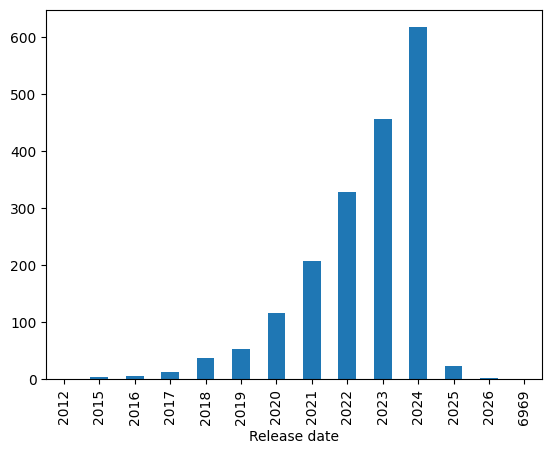

In [161]:
def leto(niz):
    try:
        return int(niz[-4:])
    except:
        return 0

datumi = podatki.copy()
datumi["release_date"] = datumi["release_date"].apply(leto)
datumi = datumi[datumi["release_date"] != 0]
datumi.groupby("release_date").size().plot.bar(xlabel="Release date")


{'Action': 894, 'Casual': 926, 'Indie': 1574, 'RPG': 318, 'Adventure': 637, 'Free To Play': 174, 'Strategy': 473, 'Simulation': 301, 'Early Access': 257, 'Animation & Modeling': 7, 'Design & Illustration': 12, 'Game Development': 10, 'Massively Multiplayer': 24, 'Racing': 60, 'Utilities': 10, 'Software Training': 1, 'Sports': 59, 'Education': 2, 'Video Production': 1, '': 2, 'Photo Editing': 1}


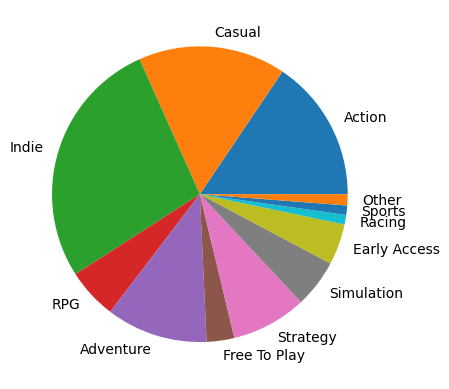

In [162]:
slovar = {}
def dodaj_v_slovar(seznam,slovar):
    for skoraj_zanr in seznam[1:-1].split(", "):
        zanr = skoraj_zanr.replace("'","").replace(",","")
        if zanr in slovar:
            slovar[zanr] += 1
        else:
            slovar[zanr] = 1

podatki["genre"].apply(lambda x: dodaj_v_slovar(x,slovar))
print(slovar)
Other = 0
odstrani = []
for key,item in slovar.items():
    if item < 50:
        Other += item
        odstrani.append(key)
for i in odstrani:
    del slovar[i]
slovar["Other"] = Other

plt.pie(slovar.values(), labels=slovar.keys())
plt.show()

In [163]:
ne_igre = podatki[podatki["app_type"] != "Game"]
ne_igre[["ime","app_type"]]

,ime,app_type
80,RPG in a Box,Software
137,PNGTuber Plus,Software
148,Tree It,Software
222,PixelOver,Software
430,Kinetic Anatomy 3D,Software
564,BlastFX,Software
614,Cauldron Caution Demo,Demo
615,Block Shop Demo,Demo
629,MOR...E TRAINER (Learning Morse Code),Software
673,Oblin Party Demo,Demo
